<a href="https://colab.research.google.com/github/p82maavd/MIML/blob/main/src/miml/tutorial/data_miml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the library on enviroment
!pip install mimllearning==0.5.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 844.8/844.8 kB 4.6 MB/s eta 0:00:00


# Load and show dataset

In [2]:
from miml.data import load_dataset

# Load dataset from library
dataset = load_dataset("toy.arff", from_library=True)
print("Show dataset in table mode")
print("--------------------------")
dataset.show_dataset(mode="table")
print("")
print("Show dataset in compact mode")
print("----------------------------")
dataset.show_dataset(mode="csv")

Show dataset in table mode
--------------------------
+--------+------+------+------+----------+----------+----------+----------+
|  bag1  |  f1  |  f2  |  f3  |  label1  |  label2  |  label3  |  label4  |
+========+======+======+======+==========+==========+==========+==========+
|   0    |  42  | -198 | -109 |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
|   1    | 41.9 | -191 | -142 |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
|   2    |  35  | 14.2 | 6.33 |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
+--------+-------+------+------+----------+----------+----------+----------+
|  bag2  |  f1   |  f2  |  f3  |  label1  |  label2  |  label3  |  label4  |
+========+=======+======+======+==========+==========+==========+==========+
|   0    | 11.25 | -98  |  10  

# Metrics of dataset

In [3]:
# Shows dataset metrics
dataset.describe()

-----MULTILABEL-----
Cardinality:  2.0
Density:  0.5
Distinct:  0.125

-----MULTIINSTANCE-----
Nº of bags:  2
Total instances:  5
Average Instances per bag:  2.5
Min Instances per bag:  2
Max Instances per bag:  3
Features per bag:  3
Labels per bag:  4
Attributes per bag:  7

Distribution of bags:
	Bags with  2  instances:  1
	Bags with  3  instances:  1


# Manage MIMLDataset, Bag and Instance class objects

In [4]:
import numpy

# Add a new attribute to the dataset and modify one of its attributes
dataset.add_attribute(name="new_feature", position=2, values=numpy.random.rand(dataset.get_number_instances()))
dataset.set_attribute(bag=0, index_instance=0, attribute=2, value=3.13)
dataset.show_dataset(start=0, end=1)

# Delete the attribute added before
dataset.delete_attribute(position=2)
dataset.show_dataset(start=0, end=1)

+--------+------+------+---------------+------+----------+----------+----------+----------+
|  bag1  |  f1  |  f2  |  new_feature  |  f3  |  label1  |  label2  |  label3  |  label4  |
+========+======+======+===============+======+==========+==========+==========+==========+
|   0    |  42  | -198 |     3.13      | -109 |    1     |    0     |    0     |    1     |
+--------+------+------+---------------+------+----------+----------+----------+----------+
|   1    | 41.9 | -191 |   0.690014    | -142 |    1     |    0     |    0     |    1     |
+--------+------+------+---------------+------+----------+----------+----------+----------+
|   2    |  35  | 14.2 |   0.208347    | 6.33 |    1     |    0     |    0     |    1     |
+--------+------+------+---------------+------+----------+----------+----------+----------+
+--------+------+------+------+----------+----------+----------+----------+
|  bag1  |  f1  |  f2  |  f3  |  label1  |  label2  |  label3  |  label4  |
+========+======+===

In [5]:
from miml.data import Instance, Bag

# Creation and modification of an instance
values = [38, 62, 5.09, 1, 0, 0, 1]
instance = Instance(values)
instance.set_attribute(attribute=2, value=74)
instance.show_instance()
print("")

# Add an instance to the dataset
dataset.add_instance(bag=0, instance=instance)
dataset.show_dataset()
print("")


# Create a bag and add it to the dataset
bag=Bag("bag3")
bag.add_instance(instance)
dataset.add_bag(bag)
dataset.show_dataset()


+----+----+----+---+---+---+---+
| 38 | 62 | 74 | 1 | 0 | 0 | 1 |
+----+----+----+---+---+---+---+

+--------+------+------+------+----------+----------+----------+----------+
|  bag1  |  f1  |  f2  |  f3  |  label1  |  label2  |  label3  |  label4  |
+========+======+======+======+==========+==========+==========+==========+
|   0    |  42  | -198 | -109 |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
|   1    | 41.9 | -191 | -142 |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
|   2    |  35  | 14.2 | 6.33 |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
|   3    |  38  |  62  |  74  |    1     |    0     |    0     |    1     |
+--------+------+------+------+----------+----------+----------+----------+
+--------+-------+------+------+----------+----------+----------

In [6]:
# Shows all bags in the dataset
for bag_index in range(dataset.get_number_bags()):

    # Recover a bag
    bag = dataset.get_bag(bag_index)
    print("Bag:", bag.key)
    print("\tNumInstances:", bag.get_number_instances())
    print("\tNumFeatures:", bag.get_number_features())
    print("\tNumLabels:", bag.get_number_labels())
    print("\tNumAttributes:", bag.get_number_attributes())

    # Shows all instances in the bag
    for instance_index in range(bag.get_number_instances()):
        # Recovers an instance
        instance = dataset.get_instance(bag.key, instance_index)
        print("\t\tInstance:", instance_index, "NumAttributes:", instance.get_number_attributes())
        for attribute_index in range(instance.get_number_attributes()):
            print("\t\t\tAttribute", attribute_index, ":", instance.get_attribute(attribute=attribute_index))

Bag: bag1
	NumInstances: 4
	NumFeatures: 3
	NumLabels: 4
	NumAttributes: 7
		Instance: 0 NumAttributes: 7
			Attribute 0 : 42.0
			Attribute 1 : -198.0
			Attribute 2 : -109.0
			Attribute 3 : 1.0
			Attribute 4 : 0.0
			Attribute 5 : 0.0
			Attribute 6 : 1.0
		Instance: 1 NumAttributes: 7
			Attribute 0 : 41.9
			Attribute 1 : -191.0
			Attribute 2 : -142.0
			Attribute 3 : 1.0
			Attribute 4 : 0.0
			Attribute 5 : 0.0
			Attribute 6 : 1.0
		Instance: 2 NumAttributes: 7
			Attribute 0 : 35.0
			Attribute 1 : 14.2
			Attribute 2 : 6.33
			Attribute 3 : 1.0
			Attribute 4 : 0.0
			Attribute 5 : 0.0
			Attribute 6 : 1.0
		Instance: 3 NumAttributes: 7
			Attribute 0 : 38.0
			Attribute 1 : 62.0
			Attribute 2 : 74.0
			Attribute 3 : 1.0
			Attribute 4 : 0.0
			Attribute 5 : 0.0
			Attribute 6 : 1.0
Bag: bag2
	NumInstances: 2
	NumFeatures: 3
	NumLabels: 4
	NumAttributes: 7
		Instance: 0 NumAttributes: 7
			Attribute 0 : 11.25
			Attribute 1 : -98.0
			Attribute 2 : 10.0
			Attribute 3 : 0.

# Split Datasets

In [7]:
dataset = load_dataset("miml_birds.arff", from_library=True)

## Holdout

In [8]:
dataset_train, dataset_test = dataset.split_dataset(train_percentage=0.8, seed=5)

print("Nº of bags: ", dataset_train.get_number_bags(), dataset_train.data.keys())
print("Nº of bags: ",dataset_test.get_number_bags(), dataset_test.data.keys())

Nº of bags:  206 dict_keys(['326', '472', '526', '554', '489', '20', '561', '297', '516', '631', '429', '359', '588', '253', '96', '419', '422', '424', '425', '428', '431', '432', '435', '436', '438', '444', '446', '452', '454', '459', '461', '465', '470', '471', '475', '480', '481', '482', '487', '488', '490', '491', '496', '497', '504', '505', '506', '508', '509', '512', '513', '524', '528', '529', '532', '533', '534', '537', '538', '539', '546', '551', '552', '553', '555', '556', '562', '568', '570', '571', '576', '577', '578', '579', '582', '584', '585', '589', '591', '592', '595', '596', '598', '604', '610', '611', '613', '614', '619', '620', '621', '625', '630', '632', '634', '635', '640', '641', '642', '2', '4', '5', '12', '13', '18', '19', '24', '27', '28', '30', '31', '32', '33', '38', '39', '40', '43', '44', '45', '47', '49', '50', '51', '55', '64', '69', '70', '71', '72', '73', '82', '87', '88', '90', '97', '100', '102', '103', '110', '113', '114', '116', '117', '125', '129'

## Cross Validation K-FOLD

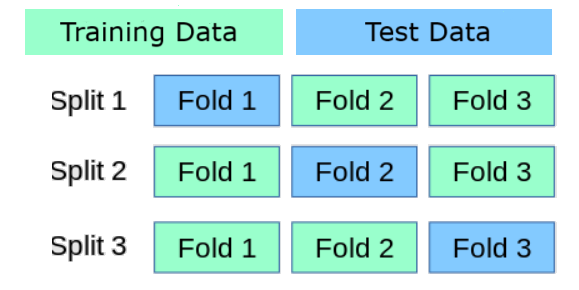

In [9]:
datasets_train, datasets_test = dataset.split_dataset_cv(folds=3, seed=5)

for dataset_train, dataset_test in zip(datasets_train, datasets_test):
  print("Nº of bags: ", dataset_train.get_number_bags(), dataset_train.data.keys())
  print("Nº of bags: ",dataset_test.get_number_bags(), dataset_test.data.keys())
  print("")

Nº of bags:  177 dict_keys(['326', '472', '526', '554', '489', '20', '561', '297', '516', '631', '429', '359', '588', '253', '96', '635', '640', '641', '642', '2', '4', '5', '12', '13', '18', '19', '24', '27', '28', '30', '31', '32', '33', '38', '39', '40', '43', '44', '45', '47', '49', '50', '51', '55', '64', '69', '70', '71', '72', '73', '82', '87', '88', '90', '97', '100', '102', '103', '110', '113', '114', '116', '117', '125', '129', '130', '132', '138', '140', '144', '150', '151', '154', '160', '161', '165', '167', '168', '169', '175', '176', '181', '182', '183', '186', '187', '190', '191', '192', '193', '194', '196', '198', '199', '200', '201', '203', '204', '205', '206', '208', '209', '210', '213', '214', '223', '227', '228', '229', '230', '231', '237', '238', '244', '245', '246', '248', '254', '255', '256', '258', '260', '261', '265', '268', '272', '273', '274', '275', '279', '281', '285', '287', '289', '290', '295', '301', '306', '307', '308', '311', '317', '318', '323', '325'

# Save modified datasets

In [10]:
dataset_train.save_arff("dataset_train.arff")
dataset_test.save_csv("dataset_test.csv")

# Check creation of datasets
!ls -l

# Check of created datasets
!cat dataset_train.arff | head -n 100
print("")
!cat dataset_test.csv | head -n 10

total 672
-rw-r--r-- 1 root root 243041 May 31 07:14 dataset_test.csv
-rw-r--r-- 1 root root 435910 May 31 07:14 dataset_train.arff
drwxr-xr-x 1 root root   4096 May 29 21:54 sample_data
@relation miml_birds2021
_train
@attribute id {f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,BRCR,PAWR,PSFL,RBNU,DEJU,OSFL,HETH,CBCH,VATH,HEWA,SWTH,HAFL,WETA,BHGB,GCKI,WAVI,MGWA,STJA,CONI}
@attribute bag relational
@attribute f0 numeric
@attribute f1 numeric
@attribute f2 numeric
@attribute f3 numeric
@attribute f4 numeric
@attribute f5 numeric
@attribute f6 numeric
@attribute f7 numeric
@attribute f8 numeric
@attribute f9 numeric
@attribute f10 numeric
@attribute f11 numeric
@attribute f12 numeric
@attribute f13 numeric
@attribute f14 numeric
@attribute f15 numeric
@attribute f16 numeric
@attribute f17 numeric
@attribute f18 numeric
@attribute f19 numeric
@attribute f20 numeric
@attribute f21 numeric
@attri